<a href="https://colab.research.google.com/github/raisa1521/Hands-on-Machine-Learning/blob/main/2%EC%9E%A5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B2%98%EC%9D%8C%EB%B6%80%ED%84%B0_%EB%81%9D%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 큰 그림을 봅니다.

2 데이터를 구합니다.

3 데이터로부터 인사이트를 얻기 위해 탐색하고 시각화합니다.

4 머신러닝 알고리즘을 위해 데이터를 준비합니다.

5 모델을 선택하고 훈련시킵니다.

6 모델을 미세 튜닝합니다.

7 솔루션을 제시합니다.

8 시스템을 론칭하고, 모니터링하고, 유지 보수합니다.

#실제 데이터로 작업하기
pg.69 - 데이터 구하는 곳
#큰 그림 보기
**<문제정의>**

파이프라인 : 데이터 처리 컴포넌트들이 연속되어 있는 것(-보통 비정기적으로 작동)

1. 컴포넌ㅌ트는 많은 데이터를 추출해 처리하고 그 결과를 다른 데이터 저장소로 보냄.
2. 파이프라인의 다음 컴포넌트가 그 데이터를 추출해 자신의 출력 결과를 만들어냄.(각 컴포넌트 독립적), 인터페이스 = 저장소
- 시스템 이해하기 쉽고, 각자의 컴포넌트에 집중할 수 있게 함. 시스템이 견고해짐.

-데이터가 너무 클 땐, **맵리듀스** 기술 활용\

**<선은 측정 지표 선택>**

회귀문제 전형적인 성능 지표 - 평균 제곱근 오차(RMSE)
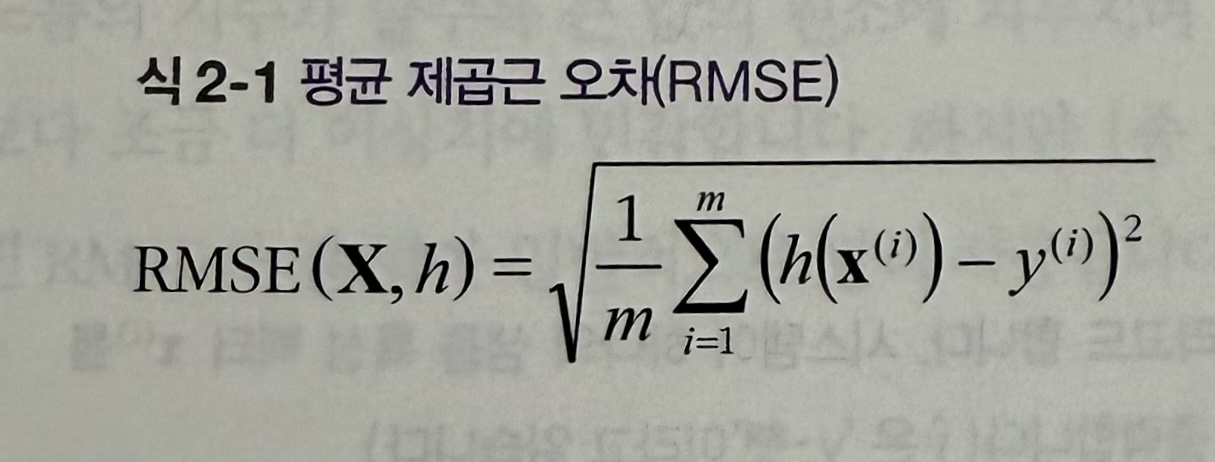

pg.73 - 표기법 : 스칼라값이나 함수를 나타낼 때는 m이나 y 또는 h와 같이 기울어진 소문자, 벡터를 나타낼 때 는 x)와 같이 굵은 소문자, 행렬을 나타낼 때는 X와 같이 굵은 대문자를 사용하겠습니다.

이상치가 많은 구간에서는 **평균 절대 오차**(평균 절대 편차) 사용

- RMSE와 MAE 모두 예측값의 벡터와 타깃값의 벡터 사이 거리를 재는 방법이지만 상황에 따라 다르게 사용

**노름(norm)** : 거리 측정 방법(유클리드 노름, 맨해튼 노름)

- 노름 지수가 클 수록 큰 값의 원소에 치우치며 작은 값은 무시됨. so RMSE가 MAE보다 이상치에 민감

**<가정 검사>**


# 데이터 가져오기

**<구글 코랩을 사용하여 예제 코드 실행하기>**

**런타임** : 무료가상 머신


**<코드와 데이터 저장하기>**


**<대화식 환경의 편리함과 위험>**

**<책의 코드와 노트북의 코드>**

**<데이터 다운로드>**

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():                                  #load_housing_data()함수-datasets/housing.tgz파일 찾음
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True,exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv")) #csv파일의 모든 데이터를 판다스 데이터 프레임으로 로드 후 객체변환

housing = load_housing_data()

/tmp/ipython-input-3331060754.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


**<데이터 구조 훑어보기>**

head() 매서드 : 데이터에 있는 n행 확인

info() 매서드 : 데이터에 관한 간략한 설명 - 전체 행 수, 각 특성의 데이터 타입과 널(null)이 아닌 값의 계수를 확인하는데 유용

value_counts 매서드 : 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지 확인

In [3]:
housing["ocean_proximity"].value_counts()    #value count() 매서드

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


count, mean, max, min std, 백분위수(사분위수) - 나타내는게 무엇인지 알기

describe() 매서드 : 숫자형 특성의 요약 정보를 보여줌

-데이터 형태 빠르게 검토하는 방법 - 각 숫자형의 특성을 히스토그램으로 그려보는 것

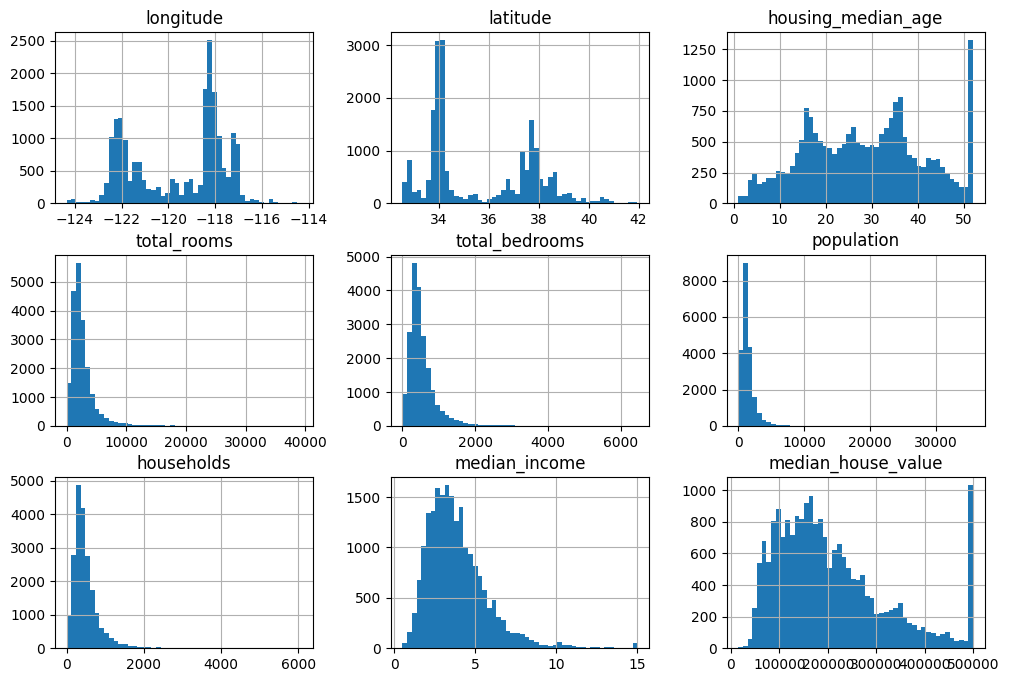

In [4]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,8)) #housing.hist() 매서드 : 모든 수자형 특성에 대한 히스토그램을 출력
plt.show()

위를  통해 알 수 있는 것

1. 중간소득 특성은 대략 수만달러

2.  중간주택연도와 중간주택가격 최댓값과 최솟값을 한정함 - 정확한 예측 어려움

3.특성들의 스케일이 서로 많이 다름

4.오른쪽 꼬리가 더 김. - 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만듬

#테스트세트 만들기

데이터 스누핑 편향 : 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을때 기대한 성능이 나오지 않는 것

In [5]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set, test_set_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

위코드- 완벽하지 않음

np.random.permutation() : 항상 같은 난수 인덱스가 생성되도록 하는 함수

np.random.seed() : 난수 발생기의 초깃값을 지정하는 것

-> 업데이트된 데이터셋을 사용할때 문제가 됨



In [7]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
housing_with_id = housing.reset_index()
# index 열이 추가된 데이터프레임이 # 반환됩니다.
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

-행의 인덱스를 ID로 사용

-안전한 특성을 사용해야함

In [9]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

train_test_split : 데이터셋을 여러 서브셋으로 나누는 방법

- shuffle_and_split_data()함수와 비슷
- 난수 초깃값을 지정할 수 있는 random_state 매개변수가 있음
- 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 동일한 인덱스 기반으로 나눌수 있음

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- 순수한 랜덤 샘플링 방식

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missin

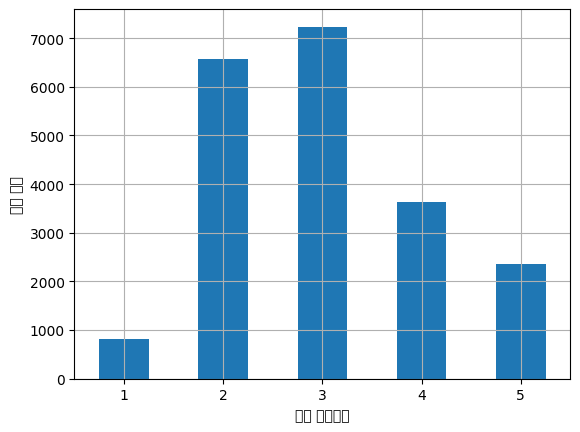

In [12]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel ("구역 개수")
plt.show

pd.cut() 함수 : 카테고리의 특성을 만듬.

sklearn.model_selection 패키지 : 사이커럿이 여러가지 클래스 제공

분할기 : 데이터셋을 훈련 세트와 테스트 세트로 분할하는 다양한 전략을 구현 -  split() 메서드로 분할

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
start_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  start_splits.append([strat_train_set_n, strat_test_set_n])

In [14]:
start_train_set, start_test_set = start_splits[0]

train_test_split() 함수와 stratify매개변수를 사용하여 간편하게 만듬

In [15]:
start_train_set, start_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [16]:
start_test_set["income_cat"].value_counts() / len(start_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


income_cat 특성을 다시 사용하지 않으므로 열을 삭제하고 데이터를 원래 상태로 되돌림

In [17]:
for set_ in (start_train_set, start_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

#데이터 이해를 위한 탐색과 시각화

In [18]:
housing = start_train_set.copy()

**지리적 데이터 시각화하기**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


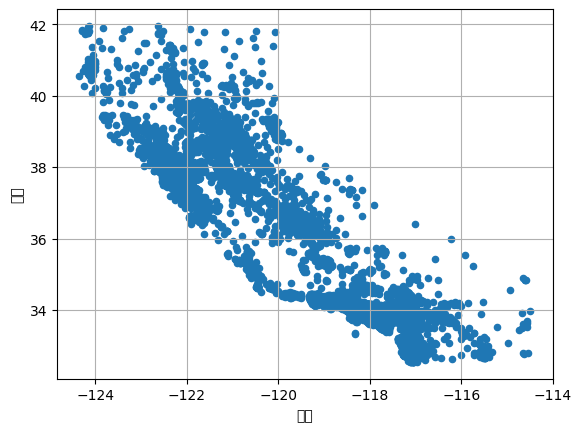

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

alpha 옵션을 0.2로 주면 데이터 포인트가 밀짐된 영역을 잘 보여줌

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


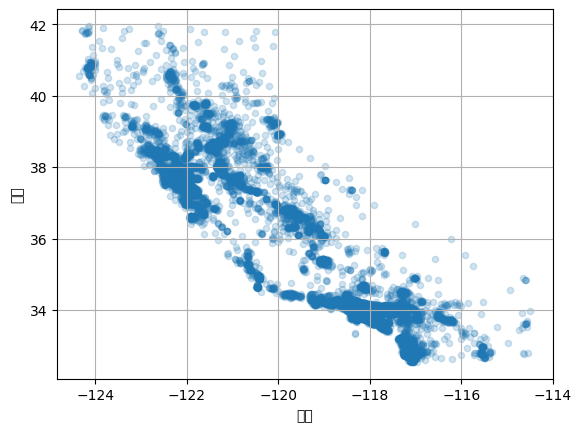

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

매개변수 camp

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

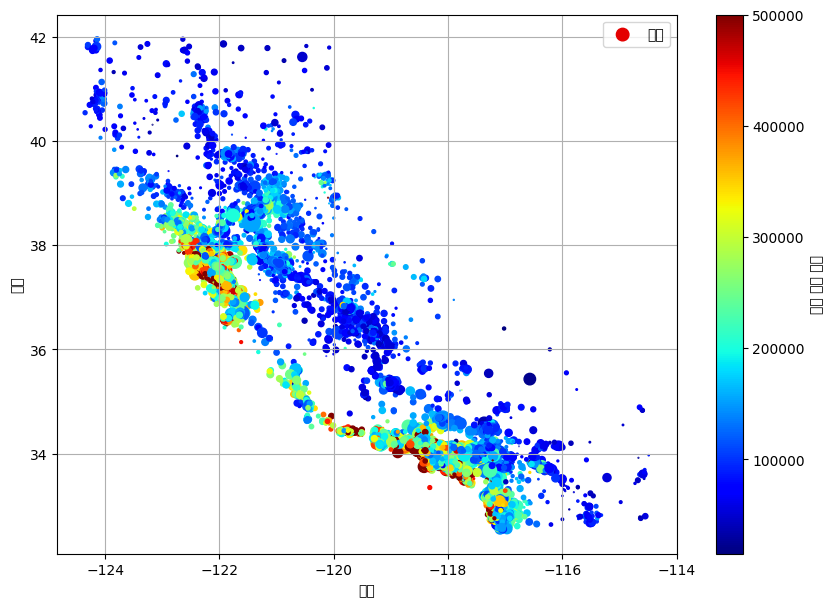

In [26]:
housing.plot(kind="scatter",x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, label="인구",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10,7))
cax=plt.gcf().get_axes()[1]
cax.set_ylabel("중간 주택 가격")
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()